In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
data = pd.read_csv("dataset_01.csv", usecols = ['author','text'])

In [53]:
data

,author,text
0,Charles Dickens,supposemuttering you you are a devil now says ...
1,Charles Dickens,might have supposed that the course was straig...
2,Charles Dickens,term request the iron gentleman to walk this w...
3,Charles Dickens,creature save himself appears except in one di...
4,Charles Dickens,shabby palanquin is borne towards them surroun...
...,...,...
24995,Jules Verne,that his powerful vessel has conquered the sea...
24996,Jules Verne,sometimes crossed his arms and observed the se...
24997,Jules Verne,preparation of some of them i acknowledged tha...
24998,Jules Verne,strike against this submarine barrier i showed...


In [54]:
data.shape

(25000, 2)

In [55]:
random_states = range(1,21)

In [56]:
def clasification(model):
    
    accuracy_test = []
    accuracy_validation = []
    
    
    for seed_number in random_states:
    # Train, Test, Validation Spit ratios 60%, 20%, 20% 

        X_train, X_test, y_train, y_test = train_test_split(data["text"], data["author"], test_size=2500, stratify= data["author"], random_state=seed_number)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2500, stratify= y_train, random_state=seed_number)

        clf = Pipeline([('tfidf',TfidfVectorizer()),('clf1',model)])
        clf.fit(X_train, y_train) 

        y_pred = clf.predict(X_test)    
        accuracy_test.append (accuracy_score(y_test, y_pred))

        y_pred = clf.predict(X_val)    
        accuracy_validation.append (accuracy_score(y_val, y_pred))
    
    y_pred = clf.predict(X_test)
    fig1 = plot_confusion_matrix(clf, X_test, y_test, normalize='pred', cmap='Blues', xticks_rotation=45) 
    fig1.ax_.set_title("Test Accuracy Confusion Matrix")
    print(classification_report(y_test, y_pred))
    print( "accuracy_score: " + str(accuracy_score(y_test, y_pred)))
    
    print("...................................Test Accuracy.................................................")
    print("Test Accuracy according to random state:" + str(accuracy_test))
    
    final_test_accuracy = 0
    for accuracy in accuracy_test:
        final_test_accuracy += accuracy
    final_test_accuracy = final_test_accuracy/20
    print( "averaged test accuracy score: " + str(final_test_accuracy))
    
    y_pred = clf.predict(X_val)
    fig2 = plot_confusion_matrix(clf, X_val, y_val, normalize='pred', cmap='Blues', xticks_rotation=45)
    fig2.ax_.set_title("Validation Accuracy Confusion Matrix")
    print(classification_report(y_val, y_pred))
    print( "accuracy_score: " + str(accuracy_score(y_val, y_pred)))
    
    print(".....................................Validation Accuracy.........................................")
    print("Validation Accuracy according to random state:" + str(accuracy_validation))
    
    final_validation_accuracy = 0
    for accuracy in accuracy_validation:
        final_validation_accuracy += accuracy
    final_validation_accuracy = final_validation_accuracy/20
    print( "averaged validation accuracy score: " + str(final_validation_accuracy))
    


                        precision    recall  f1-score   support

       Charles Dickens       0.74      0.70      0.72       500
          George Eliot       0.76      0.73      0.74       500
           Jane Austen       0.82      0.87      0.84       500
           Jules Verne       0.88      0.89      0.89       500
Sir Arthur Conan Doyle       0.84      0.84      0.84       500

              accuracy                           0.81      2500
             macro avg       0.81      0.81      0.81      2500
          weighted avg       0.81      0.81      0.81      2500

accuracy_score: 0.8068
...................................Test Accuracy.................................................
Test Accuracy according to random state:[0.7916, 0.8008, 0.8016, 0.7828, 0.7888, 0.7944, 0.806, 0.8048, 0.8036, 0.8068, 0.7872, 0.792, 0.7964, 0.8028, 0.7952, 0.7924, 0.7884, 0.802, 0.8052, 0.8068]
averaged test accuracy score: 0.7974799999999999
                        precision    recall  f1-score

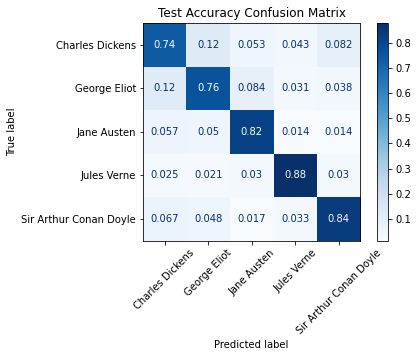

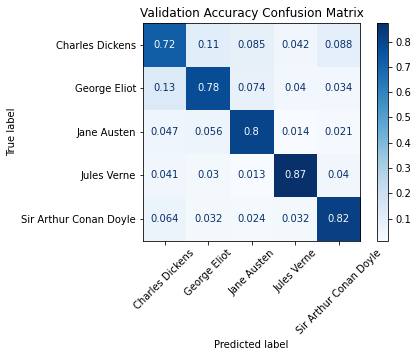

In [45]:
LR = LogisticRegression(solver='liblinear',C=1000,max_iter=1000)

clasification(LR)

                        precision    recall  f1-score   support

       Charles Dickens       0.78      0.68      0.73       500
          George Eliot       0.79      0.74      0.76       500
           Jane Austen       0.76      0.91      0.83       500
           Jules Verne       0.90      0.88      0.89       500
Sir Arthur Conan Doyle       0.82      0.83      0.83       500

              accuracy                           0.81      2500
             macro avg       0.81      0.81      0.81      2500
          weighted avg       0.81      0.81      0.81      2500

accuracy_score: 0.8084
...................................Test Accuracy.................................................
Test Accuracy according to random state:[0.8012, 0.7984, 0.7988, 0.7824, 0.7884, 0.794, 0.8, 0.796, 0.7992, 0.7944, 0.7876, 0.8008, 0.788, 0.7988, 0.7952, 0.8076, 0.786, 0.7956, 0.8012, 0.8084]
averaged test accuracy score: 0.7961
                        precision    recall  f1-score   support

    

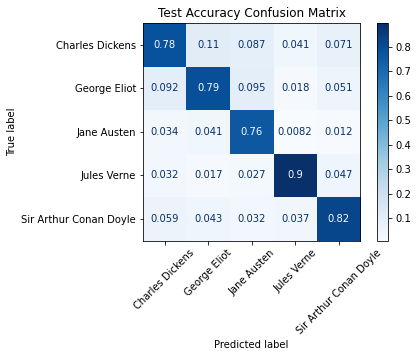

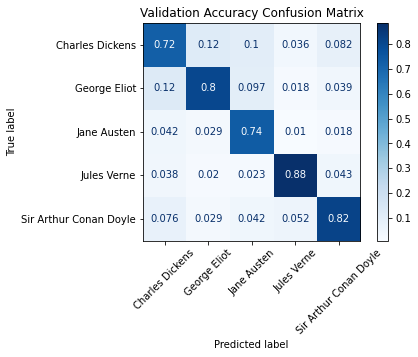

In [47]:
NB = MultinomialNB(alpha=0.1)

clasification(NB)

                        precision    recall  f1-score   support

       Charles Dickens       0.73      0.55      0.63       500
          George Eliot       0.72      0.53      0.61       500
           Jane Austen       0.64      0.87      0.74       500
           Jules Verne       0.77      0.83      0.80       500
Sir Arthur Conan Doyle       0.74      0.79      0.77       500

              accuracy                           0.71      2500
             macro avg       0.72      0.71      0.71      2500
          weighted avg       0.72      0.71      0.71      2500

accuracy_score: 0.714
...................................Test Accuracy.................................................
Test Accuracy according to random state:[0.6944, 0.7084, 0.6992, 0.6748, 0.6792, 0.6976, 0.7004, 0.6968, 0.7, 0.6936, 0.688, 0.6852, 0.698, 0.7168, 0.6988, 0.6956, 0.6932, 0.6984, 0.702, 0.714]
averaged test accuracy score: 0.69672
                        precision    recall  f1-score   support

    

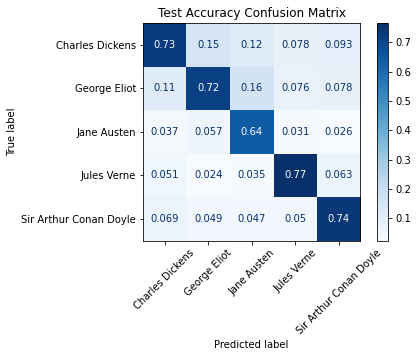

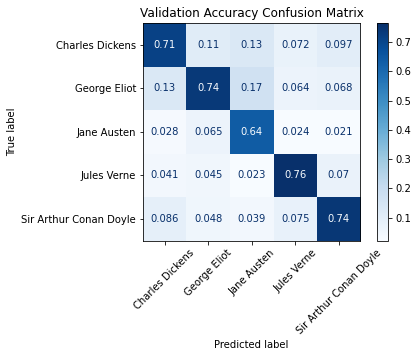

In [57]:
RFC = RandomForestClassifier(n_estimators=1000, n_jobs=-1)

clasification(RFC)

                        precision    recall  f1-score   support

       Charles Dickens       0.71      0.69      0.70       500
          George Eliot       0.73      0.74      0.74       500
           Jane Austen       0.81      0.84      0.83       500
           Jules Verne       0.88      0.87      0.87       500
Sir Arthur Conan Doyle       0.82      0.81      0.82       500

              accuracy                           0.79      2500
             macro avg       0.79      0.79      0.79      2500
          weighted avg       0.79      0.79      0.79      2500

accuracy_score: 0.7908
...................................Test Accuracy.................................................
Test Accuracy according to random state:[0.7808, 0.7828, 0.7836, 0.7624, 0.774, 0.7864, 0.7788, 0.79, 0.7808, 0.7804, 0.7664, 0.7724, 0.7808, 0.786, 0.776, 0.7724, 0.7772, 0.7844, 0.7852, 0.7908]
averaged test accuracy score: 0.7795799999999999
                        precision    recall  f1-score  

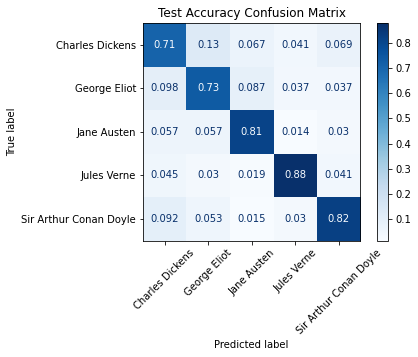

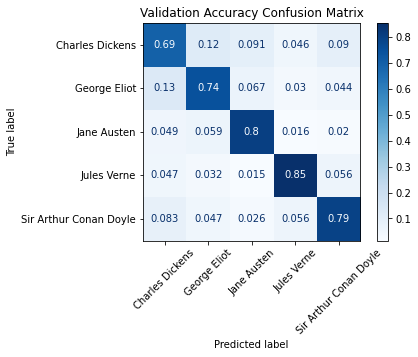

In [58]:
SVM = SVC( C = 10000, gamma = 'auto')

clasification(SVM)

C:\Users\Moditha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:21:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Moditha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:23:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Moditha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:24:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Moditha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:25:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Moditha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:26:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Moditha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Moditha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:29:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Moditha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:30:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Moditha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:31:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Moditha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:32:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Moditha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:34:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Moditha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Moditha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:36:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Moditha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:37:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Moditha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:38:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Moditha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:40:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Moditha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Moditha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:42:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Moditha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:43:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Moditha\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:45:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                        precision    recall  f1-score   support

       Charles Dickens       0.66      0.59      0.62       500
          George Eliot       0.71      0.57      0.63       500
           Jane Austen       0.73      0.82      0.77       500
           Jules Verne       0.75      0.80      0.77       500
Sir Arthur Conan Doyle       0.71      0.78      0.75       500

              accuracy                           0.71      2500
             macro avg       0.71      0.71      0.71      2500
          weighted avg       0.71      0.71      0.71      2500

accuracy_score: 0.7128
...................................Test Accuracy.......................................

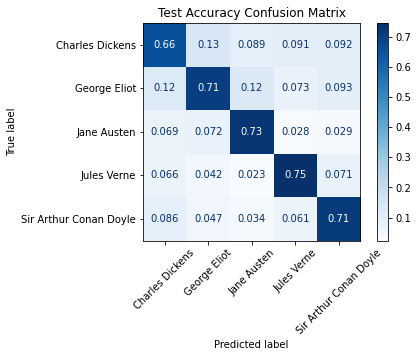

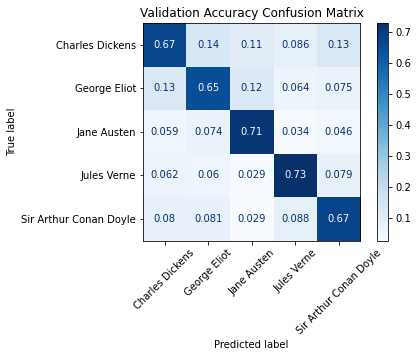

In [59]:
XGB = XGBClassifier(n_estimators = 100, tree_method='exact')

clasification(XGB)